<a href="https://colab.research.google.com/github/Pratim38pal/Machine-Learning-Projects/blob/main/Walmart_Customer_Ratings_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv('/content/dataset/WalmartSalesData.csv.csv')
dataset.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
dataset.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [4]:
data = dataset
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [11]:
# Display unique values in the 'Time' column
print(data['Time'].unique())


[13 10 20 18 14 11 17 16 19 15 12]


In [12]:
# Convert Time to numeric if it contains only hours
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')


In [13]:
# Attempt to parse time, handling errors
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')

# Check for rows that failed parsing
print(data[data['Time'].isnull()])

# If needed, clean or impute missing values
data['Time'] = data['Time'].dt.hour.fillna(0)  # Example: Filling invalid times with 0


     Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0         0     2              0       0             3       74.69         7   
1         2     1              1       0             0       15.28         5   
2         0     2              1       1             4       46.33         7   
3         0     2              0       1             3       58.22         8   
4         0     2              1       1             5       86.31         7   
..      ...   ...            ...     ...           ...         ...       ...   
995       2     1              1       1             3       40.35         1   
996       1     0              1       0             4       97.38        10   
997       0     2              0       1             2       31.84         1   
998       0     2              1       1             4       65.82         1   
999       0     2              0       0             1       88.34         7   

      Tax 5%      Total       Date Time

In [14]:
print(data['Time'].head())


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Time, dtype: float64


In [15]:
try:
    # Try to parse as HH:MM:SS format
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.hour
except Exception as e:
    print(f"Error parsing 'Time': {e}")
    # Fallback for simple hour format
    data['Time'] = pd.to_numeric(data['Time'], errors='coerce')

# Replace NaN or invalid entries if necessary
data['Time'] = data['Time'].fillna(0).astype(int)


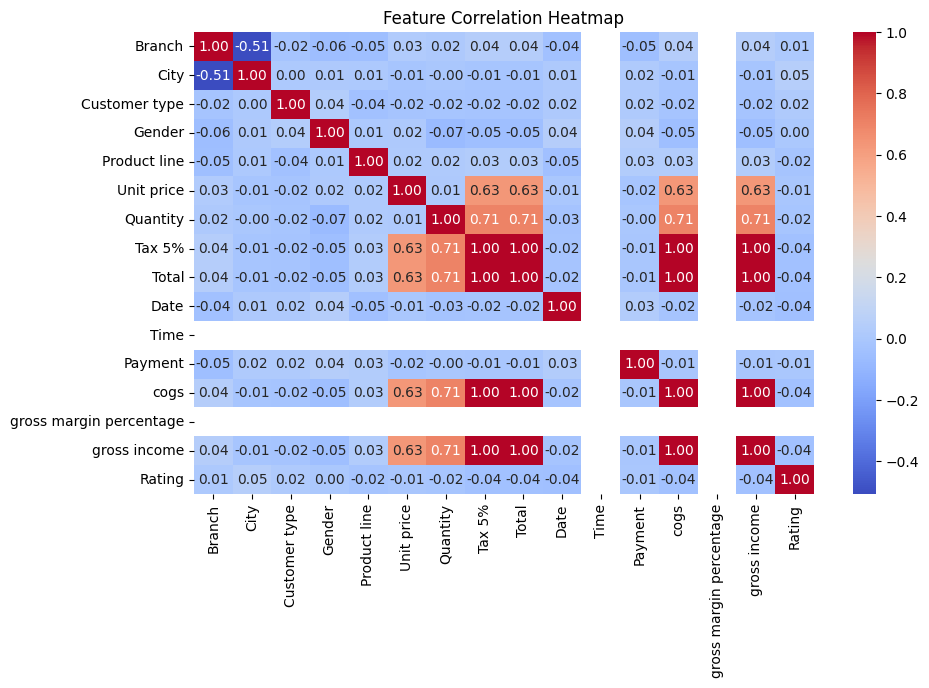

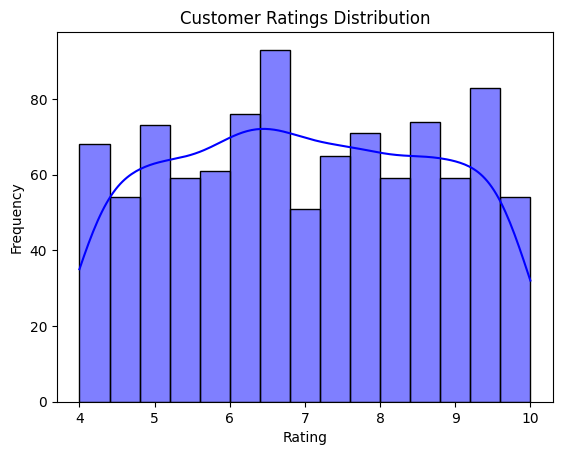

In [17]:
import matplotlib.pyplot as plt # Make sure to import matplotlib.pyplot correctly
import seaborn as sns
import pandas as pd

# ... (your existing code) ...

# Visualize correlation heatmap
plt.figure(figsize=(10, 6)) # Now plt refers to the correct module
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Visualize Ratings distribution
sns.histplot(data['Rating'], kde=True, bins=15, color='blue')
plt.title('Customer Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ... (your existing code) ...

# Define features and target variable
X = data.drop(columns=['Rating'])
y = data['Rating']

# Ensure 'Time' is numerical (if it's still datetime-like)
# This is the crucial step to fix the error
# Convert 'Time' to numeric, handle errors, and fill NaNs with 0
X['Time'] = pd.to_numeric(X['Time'], errors='coerce').fillna(0).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()

# Before applying fit_transform, explicitly convert all columns in X_train to numeric
# This ensures all features are of the expected numerical type for StandardScaler
for column in X_train.columns:
    X_train[column] = pd.to_numeric(X_train[column], errors='coerce')

# Fill any remaining NaNs after conversion with 0
X_train = X_train.fillna(0)

# Now apply fit_transform
X_train = scaler.fit_transform(X_train)


# Similarly, ensure X_test has consistent numeric types
for column in X_test.columns:
    X_test[column] = pd.to_numeric(X_test[column], errors='coerce')

X_test = X_test.fillna(0)

X_test = scaler.transform(X_test)

In [23]:
# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [24]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Root Mean Squared Error (RMSE): 1.8537819073450899
R-squared (R2): -0.1201862442140944


In [30]:

model.score(X_train,y_train), model.score(X_test, y_pred)

(0.8425315051352373, 1.0)